### Discussion with Roger Pieters on Dec 13, 2017

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 16})

In [2]:
fApril='/ocean/eolson/MEOPAR/obs/FRSampling/psd/EOS-Roger-FraserPlume-A2-C2-Counts.csv'
fMay='/ocean/eolson/MEOPAR/obs/FRSampling/psd/Roger-FraserPlume-M2-I2-Counts.csv'

In [3]:
# microns and #/ml
A=pd.read_csv(fApril,header=0,names=('diam','num'),usecols=[0,1],nrows=284)
C=pd.read_csv(fApril,header=0,names=('diam','num'),usecols=[2,3])
M=pd.read_csv(fMay,header=0,names=('diam','num'),usecols=[0,1],nrows=283)
I=pd.read_csv(fMay,header=0,names=('diam','num'),usecols=[2,3])

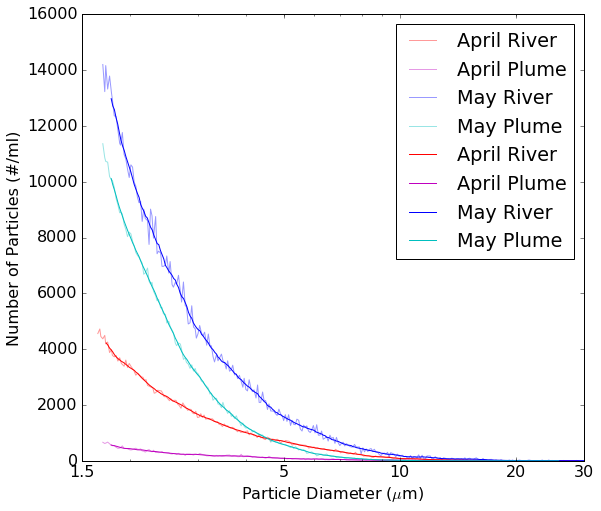

In [8]:
fig,ax=plt.subplots(1,1,figsize=(9,8))
ax.plot(A.diam,A.num,'r-',alpha=.4, label='April River')
ax.plot(C.diam,C.num,'m-',alpha=.4, label='April Plume')
ax.plot(I.diam,I.num,'b-',alpha=.4, label='May River')
ax.plot(M.diam,M.num,'c-',alpha=.4, label='May Plume')
# With moving average filter
wind=np.ones(11)/11
AfiltN=np.convolve(A.num,wind,mode='valid')
AfiltD=np.convolve(A.diam,wind,mode='valid')
CfiltN=np.convolve(C.num,wind,mode='valid')
CfiltD=np.convolve(C.diam,wind,mode='valid')
MfiltN=np.convolve(M.num,wind,mode='valid')
MfiltD=np.convolve(M.diam,wind,mode='valid')
IfiltN=np.convolve(I.num,wind,mode='valid')
IfiltD=np.convolve(I.diam,wind,mode='valid')
ax.plot(AfiltD,AfiltN,'r-',alpha=1, label='April River')
ax.plot(CfiltD,CfiltN,'m-',alpha=1, label='April Plume')
ax.plot(IfiltD,IfiltN,'b-',alpha=1, label='May River')
ax.plot(MfiltD,MfiltN,'c-',alpha=1, label='May Plume')
ax.set_xscale('log')
ax.set_xlim(1.5,30)
ax.xaxis.set_ticks([1.5,5,10,20,30])
ax.xaxis.set_ticklabels([1.5,5,10,20,30])
ax.legend()
ax.set_xlabel('Particle Diameter ($\mu$m)')
ax.set_ylabel('Number of Particles (#/ml)')

### Stokes velocity
$v=\frac{2}{9}\frac{(\rho_p-\rho_f)}{\mu}gR^2$

$\mu$ is dynamic viscosity, 0.001306 Pa$\cdot$s for fresh water at 10$^{\circ}$C

In [15]:
# max ~2% change in settling velocity due to change in water density moving from fresh to salt
(2.5-1),(2.5-1.03),(1.5-1.47)/1.5*100

(1.5, 1.47, 2.0000000000000018)

In [31]:
# r in microns
r=np.arange(1,11)

In [32]:
# calculate Stokes velocity in m/d
v=2/9*(2.5-1)*10**3/1.306e-3*9.8*(r*1e-6)**2 * 24*3600
v


array([  0.21611026,   0.86444104,   1.94499234,   3.45776417,
         5.40275651,   7.77996937,  10.58940276,  13.83105666,
        17.50493109,  21.61102603])

In [33]:
# calculate timescale = layer thickness / velocity, if particles must simply sink through layer (no mixing)
# assume 5 m thick plume layer; t=d/v
t=5/v
t # days

array([ 23.13633787,   5.78408447,   2.57070421,   1.44602112,
         0.92545351,   0.64267605,   0.47217016,   0.36150528,
         0.2856338 ,   0.23136338])

In [34]:
# on the other hand, if we suppose the plume is a well-mixed layer and loss is dC/dt=-wC/d, loss by particle size is:
# C/C0=np.exp(-wt/d)
t=2.5 # 1.5 days
CtoC0=np.exp(-v/5*t)
CtoC0

array([  8.97578111e-01,   6.49066228e-01,   3.78137962e-01,
         1.77482710e-01,   6.71129503e-02,   2.04456591e-02,
         5.01811267e-03,   9.92257080e-04,   1.58071113e-04,
         2.02873500e-05])

/home/eolson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in true_divide
/home/eolson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide
/home/eolson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in true_divide
/home/eolson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide
/home/eolson/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


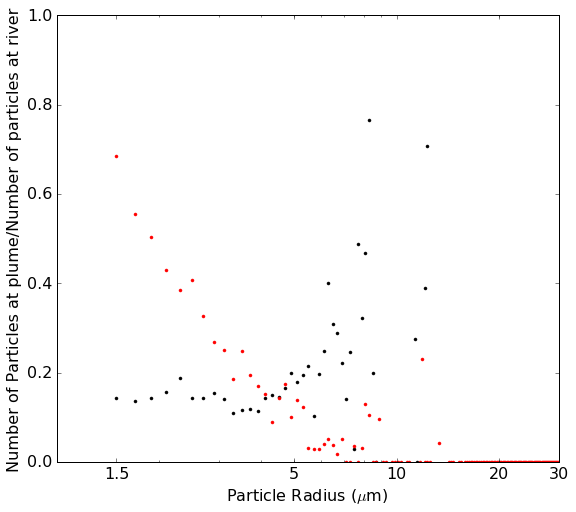

In [35]:
fig,ax=plt.subplots(1,1,figsize=(9,8))

# With moving average filter
ii=np.arange(1.5,30,.2)
Ainterp=np.interp(ii,A.diam/2,A.num)
Cinterp=np.interp(ii,C.diam/2,C.num)
Iinterp=np.interp(ii,I.diam/2,I.num)
Minterp=np.interp(ii,M.diam/2,M.num)
ax.plot(ii,Cinterp/Ainterp,'k.')
ax.plot(ii,Minterp/Iinterp,'r.')
ax.set_xscale('log')
ax.set_xlim(1,30)
ax.set_ylim(0,1)
ax.xaxis.set_ticks([1.5,5,10,20,30])
ax.xaxis.set_ticklabels([1.5,5,10,20,30])
ax.legend()
ax.set_xlabel('Particle Radius ($\mu$m)')
ax.set_ylabel('Number of Particles at plume/Number of particles at river')